# Analysis of COVID-19 Data

So we start off by querying the versions of packages used. Knowing this is always helpful when it comes to debugging certain problems.

In [1]:
import pandas as pd
print("Pandas Version = " + pd.__version__)
import numpy as np
print("Numpy Version = " + np.__version__)
import matplotlib
print("Matplotlib Version = " + matplotlib.__version__)
from IPython.display import display

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 10)
matplotlib.pyplot.style.use('seaborn-bright')

Pandas Version = 1.0.3
Numpy Version = 1.18.4
Matplotlib Version = 3.2.1


Now we are fetching data from the url provided by "Our World in Data", which you can learn more about by visiting this [link](https://github.com/owid/covid-19-data/tree/master/public/data). 

I thank the collaborators of this data collection project for their awesome work of accumulating the COVID-19 testing rates for every country along with all other relevant information. The data is updated on a daily basis.

In [2]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
data["location"] = data["location"].apply(lambda x: x.capitalize())
data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [3]:
def print_dictionary(dictionary):
    for i in dictionary:
        print("\nRows for " + i + ":")
        display(dictionary[i])

In [4]:
countries_to_analyze = ["bangladesh", "india", "pakistan", "bhutan", "nepal", "myanmar"]
countries_in_data = data["location"].unique()

countries_to_analyze = [country.capitalize() for country in countries_to_analyze]

for country in countries_to_analyze:
    if(not(country in countries_in_data)):
        print(country + " not in data, dropping...")
        countries_to_analyze.remove(country)
        
print("Countries being analyzed: ")
display(countries_to_analyze)

Countries being analyzed: 


['Bangladesh', 'India', 'Pakistan', 'Bhutan', 'Nepal', 'Myanmar']

In [5]:
dataframe_dictionary = {country: data[data["location"] == country]\
                        [["date", "total_deaths", "total_tests", "total_cases"]]\
                        for country in countries_to_analyze}

for country in dataframe_dictionary:
    dataframe_dictionary[country]["date"] = pd.to_datetime(dataframe_dictionary[country]["date"])
    dataframe_dictionary[country] = dataframe_dictionary[country].set_index("date")

print_dictionary(dataframe_dictionary)


Rows for Bangladesh:


,total_deaths,total_tests,total_cases
date,,,
2020-03-04,0,108.0,0
2020-03-05,0,111.0,0
2020-03-06,0,NaN,0
2020-03-07,0,120.0,0
2020-03-08,0,127.0,0
...,...,...,...
2020-05-16,298,167294.0,20065
2020-05-17,314,175408.0,20995
2020-05-18,328,185196.0,22268



Rows for India:


,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0,NaN,0
2020-01-01,0,NaN,0
2020-01-02,0,NaN,0
2020-01-03,0,NaN,0
2020-01-04,0,NaN,0
...,...,...,...
2020-05-16,2752,2134277.0,85940
2020-05-17,2872,2227642.0,90927
2020-05-18,3029,2302792.0,96169



Rows for Pakistan:


,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0,NaN,0
2020-01-01,0,NaN,0
2020-01-02,0,NaN,0
2020-01-03,0,NaN,0
2020-01-04,0,NaN,0
...,...,...,...
2020-05-16,834,359264.0,38799
2020-05-17,873,373410.0,40151
2020-05-18,903,387335.0,42125



Rows for Bhutan:


,total_deaths,total_tests,total_cases
date,,,
2020-03-06,0,NaN,1
2020-03-13,0,NaN,1
2020-03-15,0,NaN,1
2020-03-17,0,NaN,1
2020-03-18,0,NaN,1
...,...,...,...
2020-05-16,0,NaN,21
2020-05-17,0,NaN,21
2020-05-18,0,NaN,21



Rows for Nepal:


,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0,NaN,0
2020-01-01,0,NaN,0
2020-01-02,0,NaN,0
2020-01-03,0,NaN,0
2020-01-04,0,NaN,0
...,...,...,...
2020-05-16,0,26691.0,276
2020-05-17,1,28161.0,291
2020-05-18,2,30724.0,304



Rows for Myanmar:


,total_deaths,total_tests,total_cases
date,,,
2020-03-17,0,NaN,0
2020-03-24,0,NaN,2
2020-03-25,0,NaN,3
2020-03-26,0,NaN,3
2020-03-27,0,NaN,5
2020-03-28,0,NaN,5
2020-03-29,0,NaN,8
2020-03-30,0,NaN,8
2020-03-31,0,NaN,14


In [6]:
for country in dataframe_dictionary:
    dataframe_dictionary[country]["deaths_as_percentage_of_tests"] = \
    (dataframe_dictionary[country]["total_deaths"] / dataframe_dictionary[country]["total_tests"]) * 100
    
    dataframe_dictionary[country]["cases_as_percentage_of_tests"] = \
    (dataframe_dictionary[country]["total_cases"] / dataframe_dictionary[country]["total_tests"]) * 100
    
print_dictionary(dataframe_dictionary)


Rows for Bangladesh:


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2020-03-04,0,108.0,0,0.000000,0.000000
2020-03-05,0,111.0,0,0.000000,0.000000
2020-03-06,0,NaN,0,NaN,NaN
2020-03-07,0,120.0,0,0.000000,0.000000
2020-03-08,0,127.0,0,0.000000,0.000000
...,...,...,...,...,...
2020-05-16,298,167294.0,20065,0.178130,11.993855
2020-05-17,314,175408.0,20995,0.179011,11.969237
2020-05-18,328,185196.0,22268,0.177110,12.024018



Rows for India:


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2019-12-31,0,NaN,0,NaN,NaN
2020-01-01,0,NaN,0,NaN,NaN
2020-01-02,0,NaN,0,NaN,NaN
2020-01-03,0,NaN,0,NaN,NaN
2020-01-04,0,NaN,0,NaN,NaN
...,...,...,...,...,...
2020-05-16,2752,2134277.0,85940,0.128943,4.026656
2020-05-17,2872,2227642.0,90927,0.128926,4.081760
2020-05-18,3029,2302792.0,96169,0.131536,4.176191



Rows for Pakistan:


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2019-12-31,0,NaN,0,NaN,NaN
2020-01-01,0,NaN,0,NaN,NaN
2020-01-02,0,NaN,0,NaN,NaN
2020-01-03,0,NaN,0,NaN,NaN
2020-01-04,0,NaN,0,NaN,NaN
...,...,...,...,...,...
2020-05-16,834,359264.0,38799,0.232141,10.799579
2020-05-17,873,373410.0,40151,0.233791,10.752524
2020-05-18,903,387335.0,42125,0.233132,10.875599



Rows for Bhutan:


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2020-03-06,0,NaN,1,NaN,NaN
2020-03-13,0,NaN,1,NaN,NaN
2020-03-15,0,NaN,1,NaN,NaN
2020-03-17,0,NaN,1,NaN,NaN
2020-03-18,0,NaN,1,NaN,NaN
...,...,...,...,...,...
2020-05-16,0,NaN,21,NaN,NaN
2020-05-17,0,NaN,21,NaN,NaN
2020-05-18,0,NaN,21,NaN,NaN



Rows for Nepal:


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2019-12-31,0,NaN,0,NaN,NaN
2020-01-01,0,NaN,0,NaN,NaN
2020-01-02,0,NaN,0,NaN,NaN
2020-01-03,0,NaN,0,NaN,NaN
2020-01-04,0,NaN,0,NaN,NaN
...,...,...,...,...,...
2020-05-16,0,26691.0,276,0.000000,1.034056
2020-05-17,1,28161.0,291,0.003551,1.033344
2020-05-18,2,30724.0,304,0.006510,0.989454



Rows for Myanmar:


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2020-03-17,0,NaN,0,NaN,NaN
2020-03-24,0,NaN,2,NaN,NaN
2020-03-25,0,NaN,3,NaN,NaN
2020-03-26,0,NaN,3,NaN,NaN
2020-03-27,0,NaN,5,NaN,NaN
2020-03-28,0,NaN,5,NaN,NaN
2020-03-29,0,NaN,8,NaN,NaN
2020-03-30,0,NaN,8,NaN,NaN
2020-03-31,0,NaN,14,NaN,NaN


In [7]:
data_plot_deaths = pd.concat([v["deaths_as_percentage_of_tests"]\
                              .rename(k)\
                              for k, v in dataframe_dictionary.items()], axis=1)

data_plot_deaths = data_plot_deaths.replace(np.inf, 0)
data_plot_deaths = data_plot_deaths.replace(np.nan, 0)

data_plot_deaths

,Bangladesh,India,Pakistan,Bhutan,Nepal,Myanmar
date,,,,,,
2019-12-31,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2020-01-01,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2020-01-02,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2020-01-03,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2020-01-04,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...
2020-05-16,0.178130,0.128943,0.232141,0.0,0.000000,0.042860
2020-05-17,0.179011,0.128926,0.233791,0.0,0.003551,0.041206
2020-05-18,0.177110,0.131536,0.233132,0.0,0.006510,0.000000


In [8]:
data_plot_cases = pd.concat([v["cases_as_percentage_of_tests"]\
                              .rename(k)\
                              for k, v in dataframe_dictionary.items()], axis=1)

data_plot_cases = data_plot_cases.replace(np.inf, 0)
data_plot_cases = data_plot_cases.replace(np.nan, 0)

data_plot_cases

,Bangladesh,India,Pakistan,Bhutan,Nepal,Myanmar
date,,,,,,
2019-12-31,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2020-01-01,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2020-01-02,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2020-01-03,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2020-01-04,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...
2020-05-16,11.993855,4.026656,10.799579,0.0,1.034056,1.300093
2020-05-17,11.969237,4.081760,10.752524,0.0,1.033344,1.249914
2020-05-18,12.024018,4.176191,10.875599,0.0,0.989454,0.000000


In [9]:
data_plot_deaths_smooth = data_plot_deaths.ewm(com=(1 - (1/data_plot_deaths.shape[0]))).mean()
data_plot_cases_smooth = data_plot_cases.ewm(com=(1 - (1/data_plot_cases.shape[0]))).mean()

Text(0, 0.5, 'Percentage (%)')

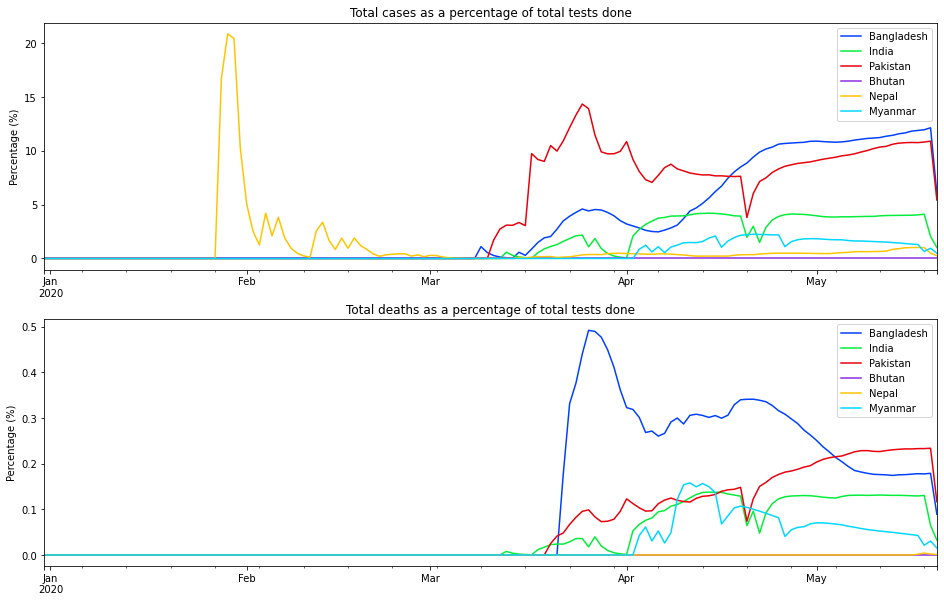

In [10]:
fig, axes = matplotlib.pyplot.subplots(nrows=2, ncols=1)

ax1 = data_plot_cases_smooth.plot(ax = axes[0], title = "Total cases as a percentage of total tests done")
ax1.set_xlabel("")
ax1.set_ylabel("Percentage (%)")
ax2 = data_plot_deaths_smooth.plot(ax = axes[1], title = "Total deaths as a percentage of total tests done")
ax2.set_xlabel("")
ax2.set_ylabel("Percentage (%)")

In [11]:
#data_plot_deaths.plot().get_figure().savefig("covid-deaths.png")
#data_plot_cases.plot().get_figure().savefig("covid-cases.png")